In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 1. Load dataset
df = pd.read_csv("ai4i2020.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (10000, 14)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
target = "Machine failure"

X = df.drop(columns=[target, "Product ID", "Type", "UDI"])   # remove ID & categorical
y = df[target]

In [ ]:
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
# 4. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 5. SVM Model
svm = SVC(
    kernel="rbf",
    probability=True,
    class_weight="balanced",   # important for rare failures
    C=5,
    gamma="scale"
)

svm.fit(X_train_scaled, y_train)

SVC(C=5, class_weight='balanced', probability=True)

In [ ]:

# 6. Predictions
y_pred = svm.predict(X_test_scaled)
y_prob = svm.predict_proba(X_test_scaled)[:, 1]

# 7. Evaluation
print("\n----- CONFUSION MATRIX -----")
print(confusion_matrix(y_test, y_pred))

print("\n----- CLASSIFICATION REPORT -----")
print(classification_report(y_test, y_pred))

print("\nROC-AUC:", roc_auc_score(y_test, y_prob))


----- CONFUSION MATRIX -----
[[1932    0]
 [   2   66]]

----- CLASSIFICATION REPORT -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000


ROC-AUC: 0.9855224698575082


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

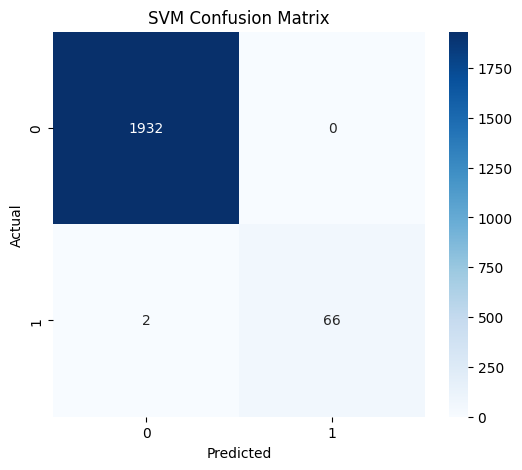

In [ ]:

# 1. Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


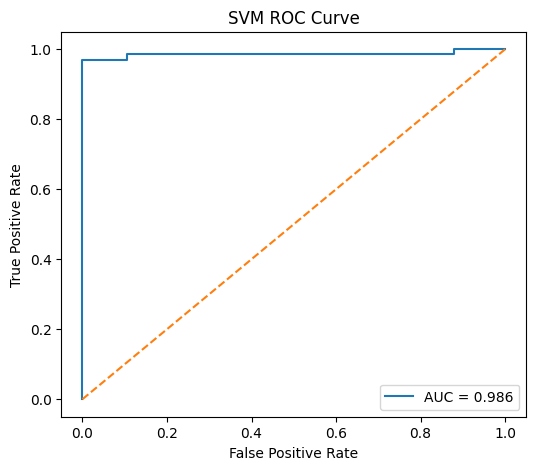

In [ ]:
# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.legend()
plt.show()


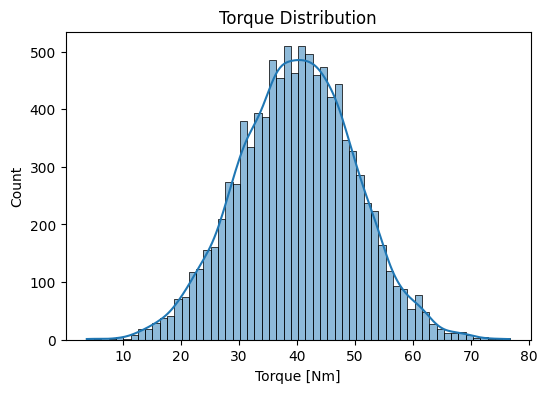

In [ ]:
# 3. Feature Distribution Example (Torque)
plt.figure(figsize=(6,4))       # <-- FIXED
sns.histplot(df["Torque [Nm]"], kde=True)
plt.title("Torque Distribution")
plt.show()

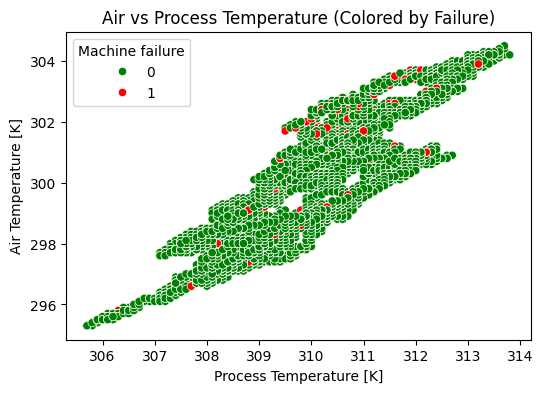

In [ ]:
# 4. Scatter Plot: Temperature vs Failure
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df["Process temperature [K]"],
    y=df["Air temperature [K]"],
    hue=df["Machine failure"],
    palette=["green","red"]
)
plt.title("Air vs Process Temperature (Colored by Failure)")
plt.xlabel("Process Temperature [K]")
plt.ylabel("Air Temperature [K]")
plt.show()

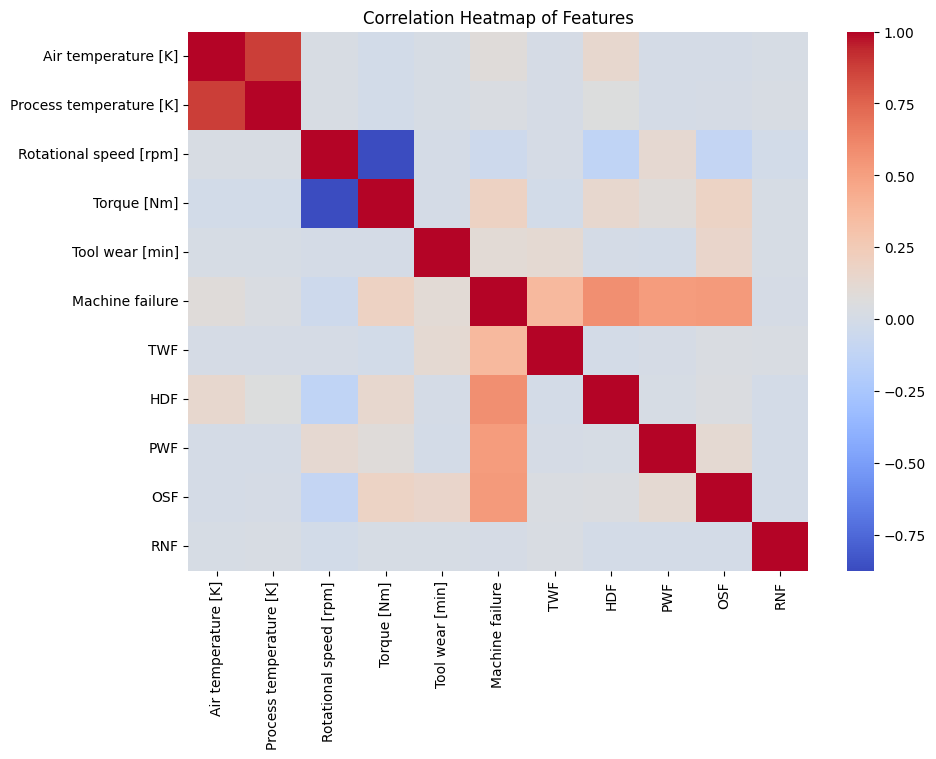

In [ ]:

# 5. Correlation Heatmap
plt.figure(figsize=(10,7))
corr = df.drop(columns=["Product ID","Type","UDI"]).corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

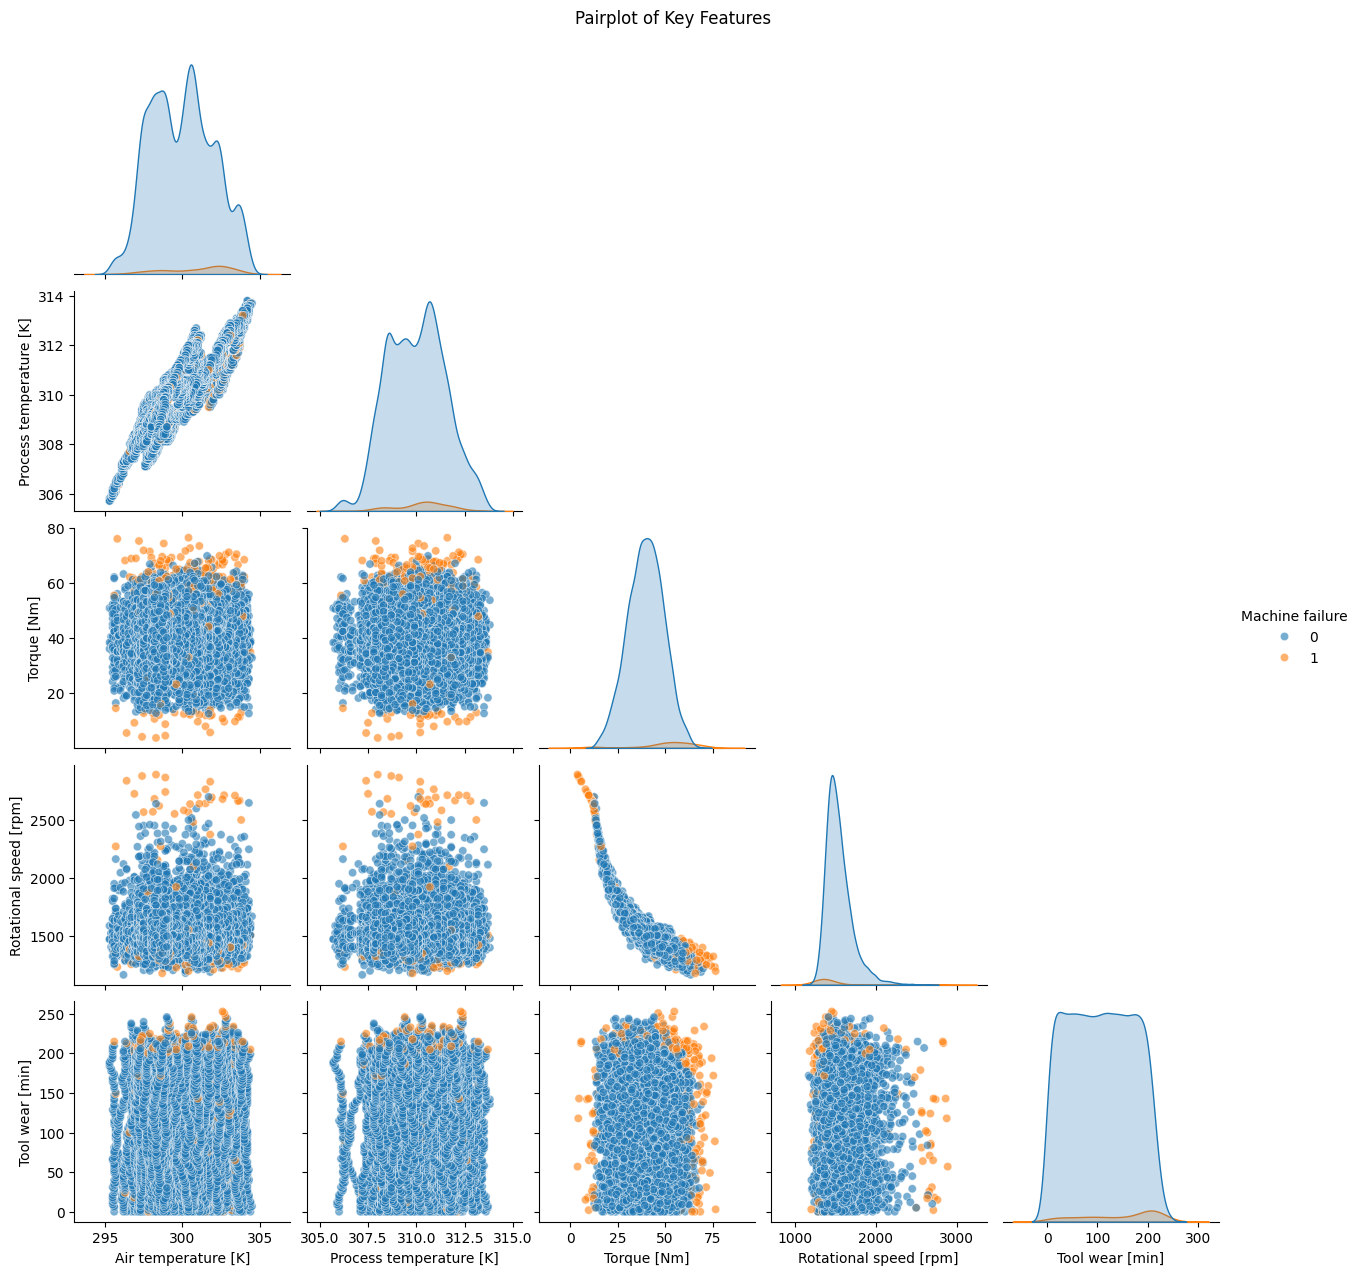

In [ ]:
# 6. Pairplot of Important Features
important_features = [
    "Air temperature [K]",
    "Process temperature [K]",
    "Torque [Nm]",
    "Rotational speed [rpm]",
    "Tool wear [min]",
    "Machine failure"
]

sns.pairplot(
    df[important_features],
    hue="Machine failure",
    corner=True,
    plot_kws={"alpha":0.6}
)
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()


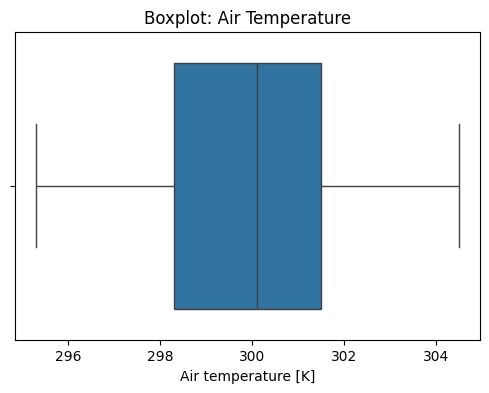

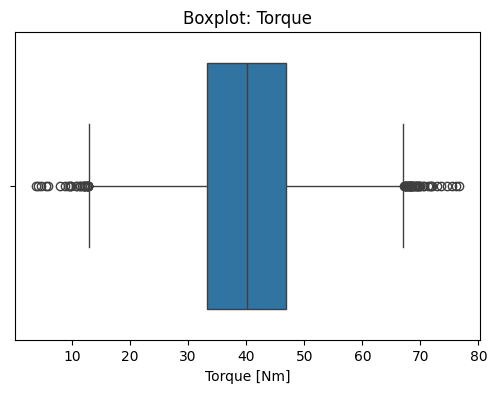

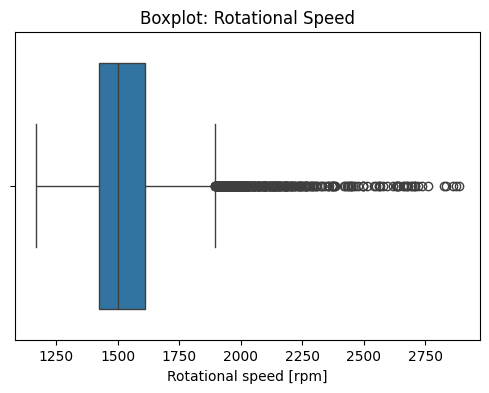

In [ ]:
# 7. Boxplots to Inspect Outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Air temperature [K]"])
plt.title("Boxplot: Air Temperature")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df["Torque [Nm]"])
plt.title("Boxplot: Torque")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df["Rotational speed [rpm]"])
plt.title("Boxplot: Rotational Speed")
plt.show()